In [6]:
import matplotlib.pyplot as plt

In [7]:
ge_path = "/mnt/SCA1/CARDIS/script/graph_gan/numeric/"

# Plotting Guessing Entropies

In [8]:
archi_list = {
    'mlp_best': '#1f77b4',
    'cnn_best': '#ff7f0e',
    'zaid_desync_0': '#2ca02c',
    'noConv1_desync_0': '#d62728',
}
attack_list = {
    'PCA': '#9467bd',
    'LDA': '#8c564b',
    'CPA': '#e377c2',
}

## Power to EM Translation

In [9]:
devices = ('F0','F1','F2','F4')

## Plot GEs

Targetting F0


NameError: name 'result_format' is not defined

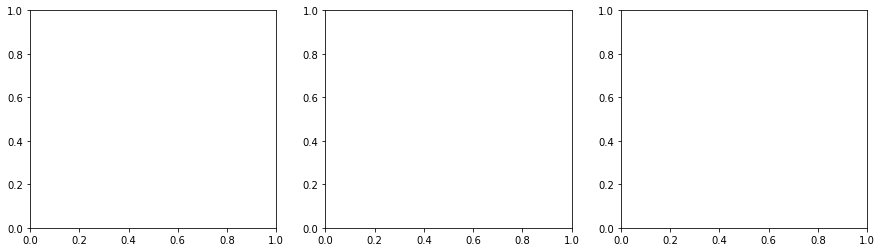

In [10]:
import matplotlib.pyplot as plt
archi = 'segan'

targets = {
    'pw': 40,
    'fake_rmsprop':140,
    'em': 170
}

for device in devices:
    print('Targetting {}'.format(device))
    fig, axes = plt.subplots(1,3)
    fig.set_figheight(4)
    fig.set_figwidth(15)
    id = 0
    for attack_set, ylim in targets.items():
        result_filename = result_format.format(device,attack_set,archi)
        axes[id].set_title('Attacking {} traces'.format(attack_set))
        axes[id].set_ylim(0,ylim)
        # add ML-based attacks
        with open(result_filename,'r') as fin:
            content = json.loads(fin.read())
            x = content['abscissa']
            ranks = content['ranks']
            for model in ranks:
                mean = np.mean(ranks[model],axis=0)
                model_name = model.split('/')[-1]
                model_name = model_name[:model_name.find('trained')-1]
                if device != 'F3':
                    axes[id].plot(x[:50],mean[:50],label=model_name+' (trained pw)',color=archi_list[model_name])
                else:
                    axes[id].plot(x,mean,label=model_name+' (trained pw)',color=archi_list[model_name])
        # add classical attacks if em
        if attack_set == 'em':
            for attack in attack_list:
                result_filename = result_classical_format.format(device,attack_set,attack)
                ranks = np.load(result_filename)
                mean = np.mean(ranks,axis=0)
                # hack LDA
                if attack == 'LDA':
                    mean[0] = 128
                if device != 'F3':
                    axes[id].plot(mean[:50],label=attack,color=attack_list[attack])
                else:
                    axes[id].plot(mean,label=attack,color=attack_list[attack])
        id += 1
    axes[2].legend(loc='upper center',bbox_to_anchor=(0.5, -0.2))
    plt.show()